### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [10]:
import pandas as pd

# Load the dataset (adjust the path as needed)
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Convert 'isBestSeller' column to numeric if necessary (e.g., 'Yes'/'No' to 1/0)
df['isBestSeller'] = df['isBestSeller'].map({'Yes': 1, 'No': 0}).fillna(df['isBestSeller'])

# Create the crosstab for category and best-seller status
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Print column names to check for the correct labels
print(crosstab.columns)

# Calculate the proportion of best-sellers for each category (dynamically using column names)
if 1 in crosstab.columns and 0 in crosstab.columns:
    crosstab['best_seller_proportion'] = crosstab[1] / (crosstab[0] + crosstab[1])
elif True in crosstab.columns and False in crosstab.columns:
    crosstab['best_seller_proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Sort by the proportion in descending order
crosstab_sorted = crosstab.sort_values(by='best_seller_proportion', ascending=False)

# Display the result
print(crosstab_sorted)

/var/folders/yr/gmmc3xcx5xg406qfnj2bnx340000gn/T/ipykernel_41731/1510070570.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['isBestSeller'] = df['isBestSeller'].map({'Yes': 1, 'No': 0}).fillna(df['isBestSeller'])


Index([False, True], dtype='bool', name='isBestSeller')
isBestSeller                      False  True  best_seller_proportion
category                                                             
Grocery                            9008   556                0.058135
Smart Home Security & Lighting       98     6                0.057692
Health & Personal Care             9017   552                0.057686
Mobile Phone Accessories            248    11                0.042471
Power & Hand Tools                 8353   306                0.035339
...                                 ...   ...                     ...
CD, Disc & Tape Players            8798     0                0.000000
General Music-Making Accessories    259     0                0.000000
Snowboard Boots                    1449     0                0.000000
Boxes & Organisers                  911     0                0.000000
eBook Readers & Accessories         246     0                0.000000

[296 rows x 3 columns]


In [11]:
import scipy.stats as stats
import numpy as np

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

# Cramér's V calculation
n = crosstab.sum().sum()
phi2 = chi2 / n
r, k = crosstab.shape
cramers_v = np.sqrt(phi2 / min(r - 1, k - 1))

print(f"Chi-squared Test p-value: {p}")
print(f"Cramér's V: {cramers_v}")

Chi-squared Test p-value: 0.0
Cramér's V: 0.08663731815334759


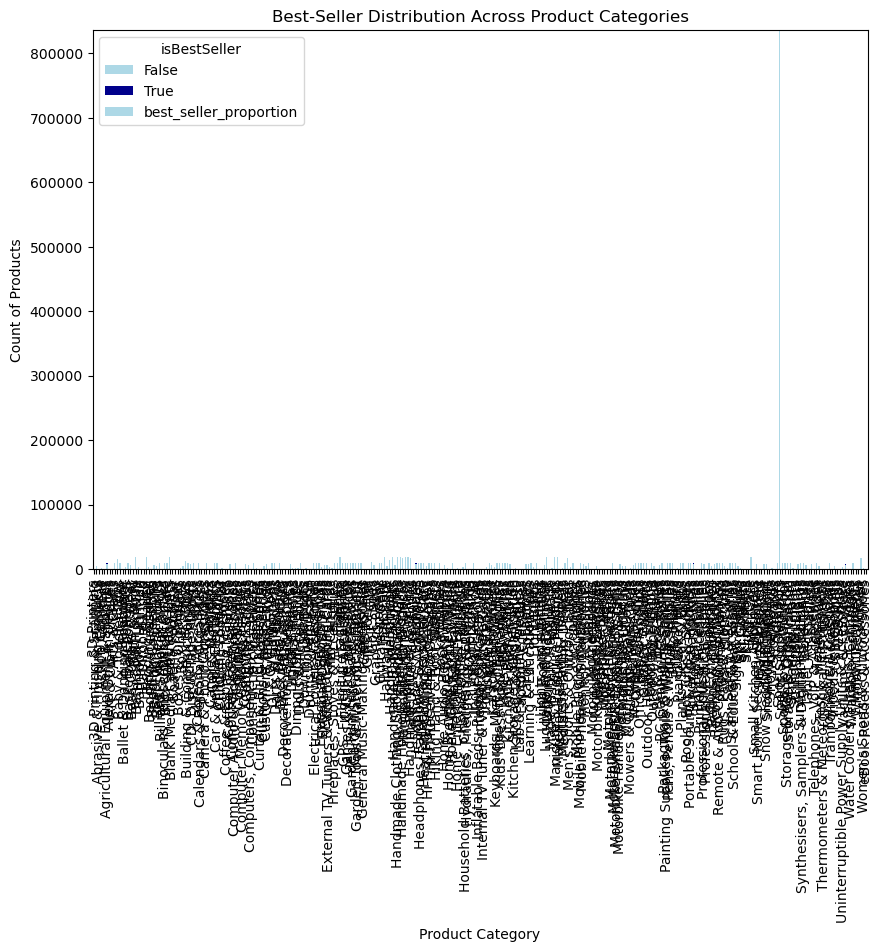

In [12]:
import matplotlib.pyplot as plt

# Plot the crosstab as a stacked bar chart
crosstab.plot(kind='bar', stacked=True, color=['lightblue', 'darkblue'], figsize=(10, 7))
plt.title("Best-Seller Distribution Across Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Count of Products")
plt.xticks(rotation=90)
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [13]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

/var/folders/yr/gmmc3xcx5xg406qfnj2bnx340000gn/T/ipykernel_41731/4065788038.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=df_top_20, palette="muted")


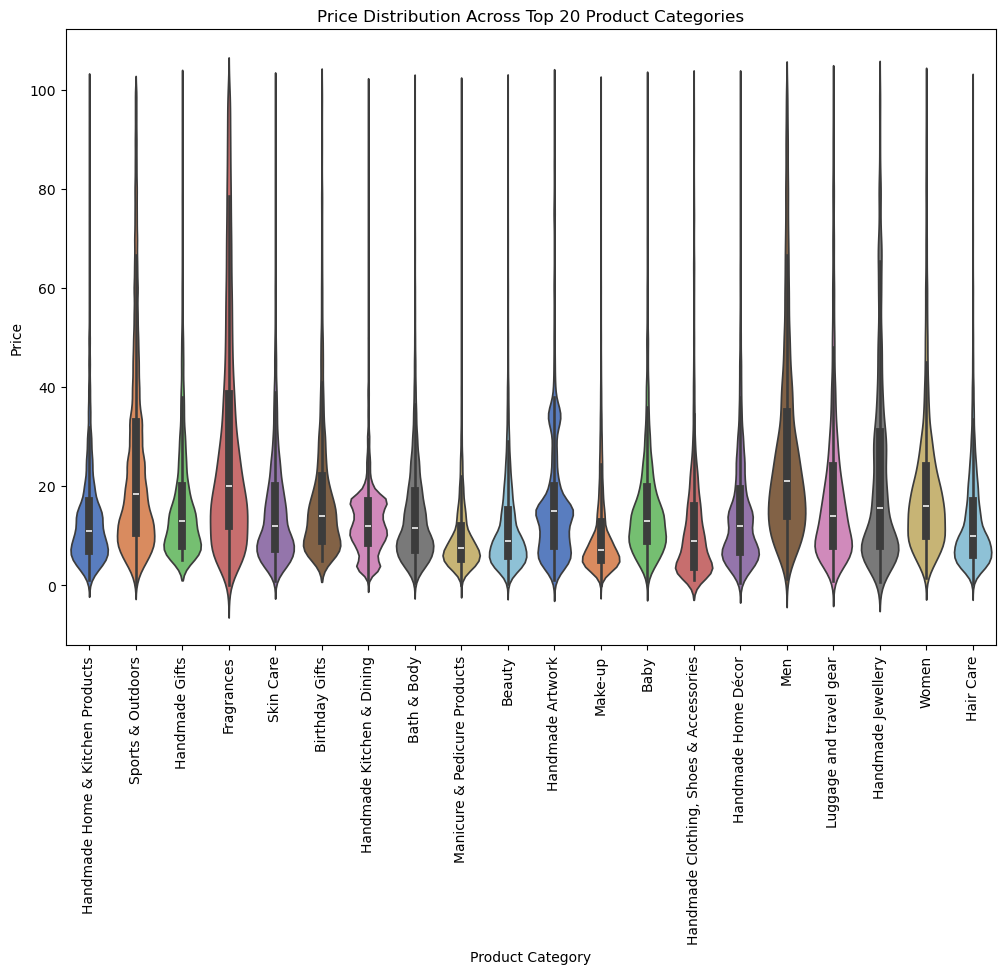

In [14]:
import seaborn as sns

# Get the top 20 categories by count
top_20_categories = df_filtered['category'].value_counts().head(20).index

# Filter the dataset for the top 20 categories
df_top_20 = df_filtered[df_filtered['category'].isin(top_20_categories)]

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_top_20, palette="muted")
plt.title("Price Distribution Across Top 20 Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

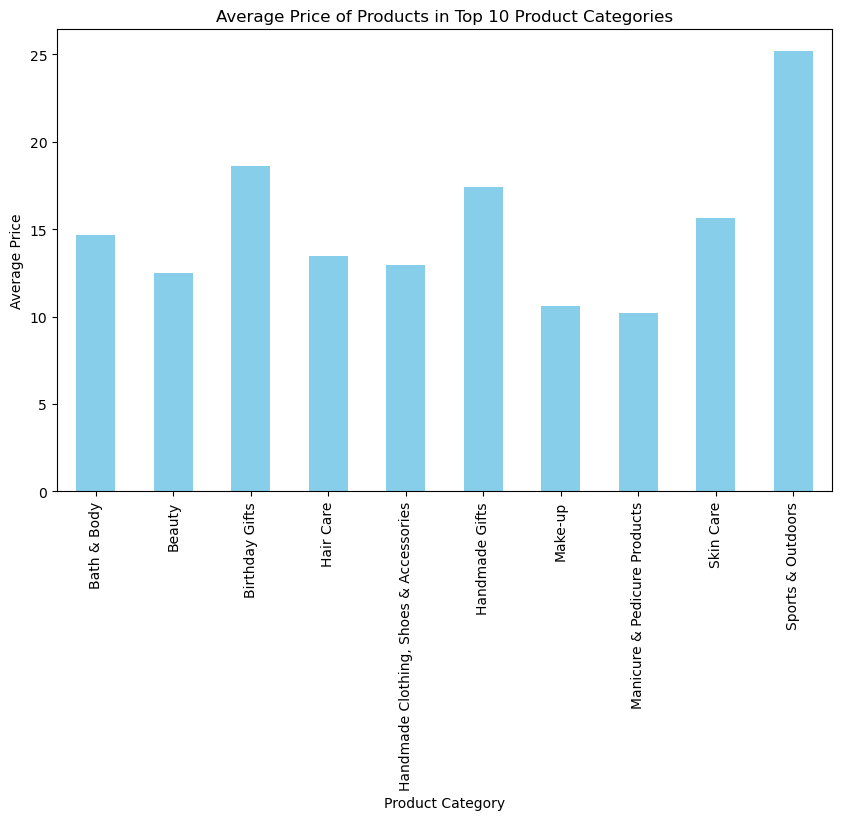

In [15]:
# Get the top 10 categories by count
top_10_categories = df_filtered['category'].value_counts().head(10).index

# Calculate the average price for each top 10 category
avg_price_by_category = df_filtered[df_filtered['category'].isin(top_10_categories)] \
    .groupby('category')['price'].mean()

# Plot the bar chart
avg_price_by_category.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Average Price of Products in Top 10 Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

/var/folders/yr/gmmc3xcx5xg406qfnj2bnx340000gn/T/ipykernel_41731/306861674.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=df_top_10_ratings, palette="muted")


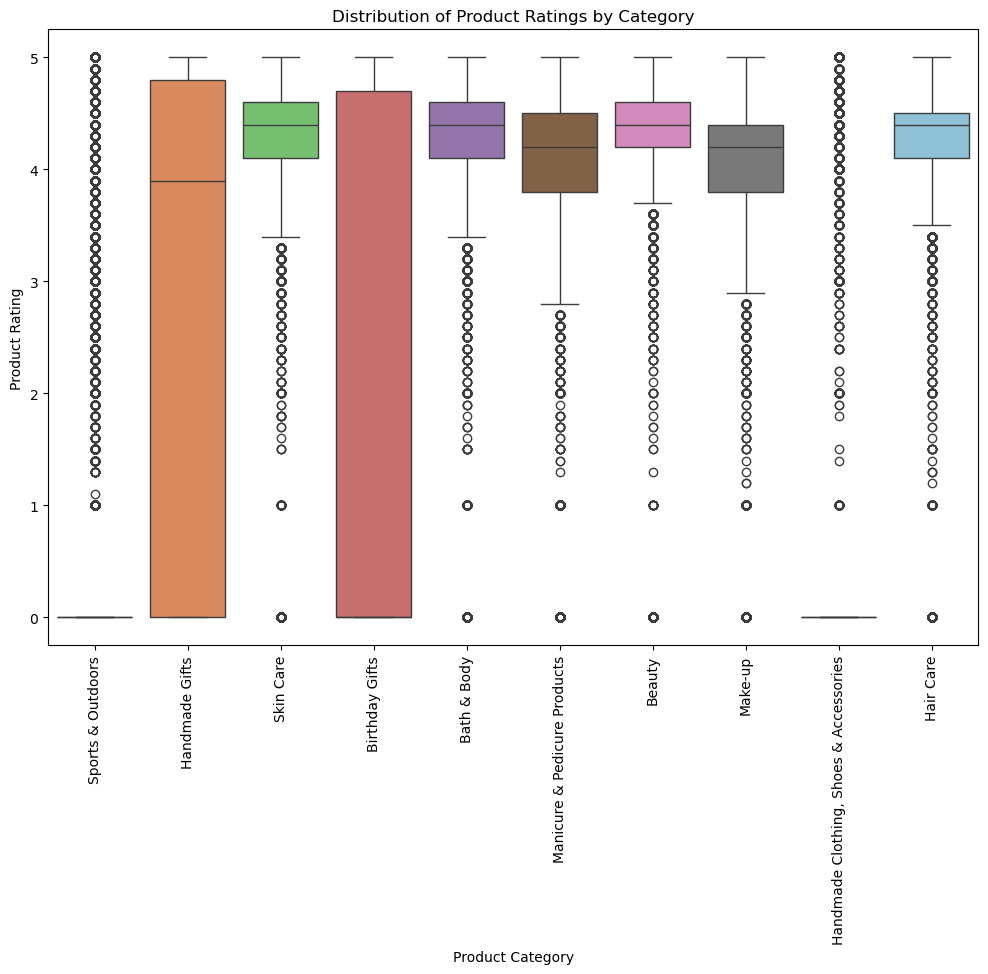

In [16]:
# Get the top 10 categories by count
top_10_categories_ratings = df_filtered['category'].value_counts().head(10).index

# Filter the dataset for the top 10 categories
df_top_10_ratings = df_filtered[df_filtered['category'].isin(top_10_categories_ratings)]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_10_ratings, palette="muted")
plt.title("Distribution of Product Ratings by Category")
plt.xlabel("Product Category")
plt.ylabel("Product Rating")
plt.xticks(rotation=90)
plt.show()

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot.

In [17]:
correlation = df_filtered[['price', 'stars']].corr(method='pearson')
print(f"Correlation between price and stars: {correlation.iloc[0, 1]}")

Correlation between price and stars: -0.07767299878181261


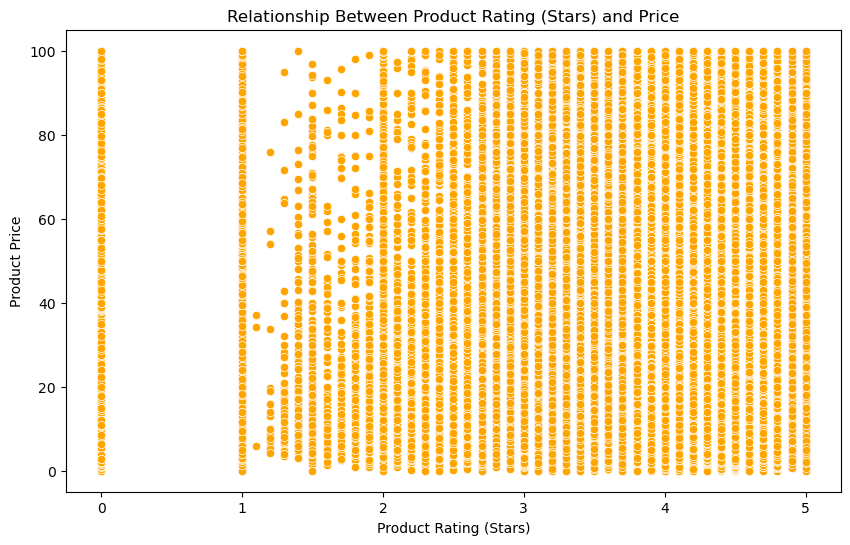

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=df_filtered, color='orange')
plt.title("Relationship Between Product Rating (Stars) and Price")
plt.xlabel("Product Rating (Stars)")
plt.ylabel("Product Price")
plt.show()

In [21]:
# Convert 'price' column to numeric, coercing errors to NaN (if any invalid entries are found)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Check for any NaN values that might have been introduced during the conversion
print(df['price'].isnull().sum())

# Optionally, drop rows with NaN values in the 'price' column
df = df.dropna(subset=['price'])

# Convert 'stars' column to numeric, coercing errors to NaN (if any invalid entries are found)
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Check for any NaN values that might have been introduced during the conversion
print(df['stars'].isnull().sum())

# Optionally, drop rows with NaN values in the 'stars' column
df = df.dropna(subset=['stars'])

# Calculate correlation coefficient between 'price' and 'stars'
correlation = df['price'].corr(df['stars'])

# Display the correlation
print("Correlation between price and stars:", correlation)

0
0
Correlation between price and stars: -0.1249067326214869


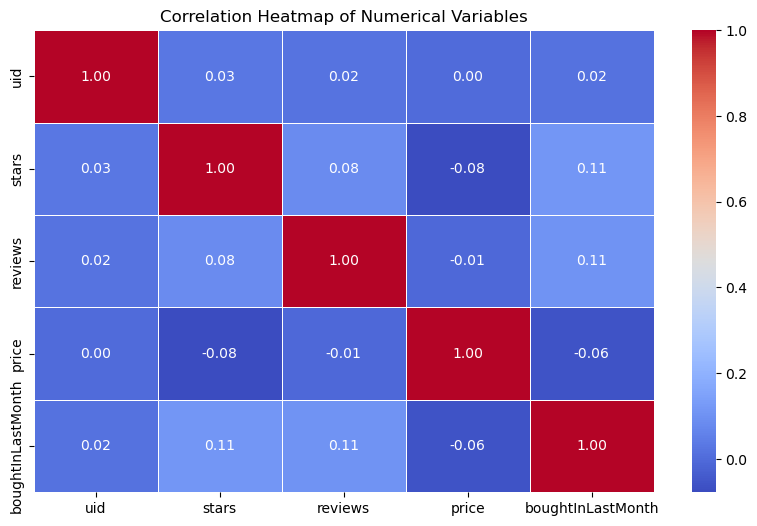

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numeric columns for correlation calculation
df_numeric = df_filtered.select_dtypes(include=['number'])

# Handle missing values by dropping rows with NaN values (or you can use fillna() if necessary)
df_numeric = df_numeric.dropna()

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

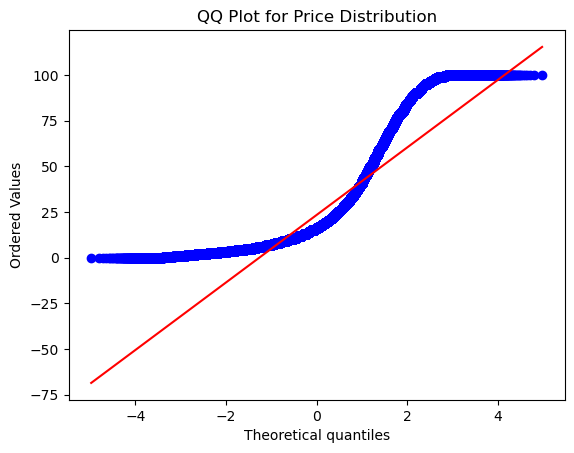

In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# QQ plot for price distribution
stats.probplot(df_filtered['price'], dist="norm", plot=plt)
plt.title("QQ Plot for Price Distribution")
plt.show()
